## 05 basic plots. 

#### The following notebook I will explore basic plots using the seaborn and matplotlib library.

I have found transitioning from R to Python plotting challenging. Seaborn does make things simpler and easier - but this is by design as this library is set up for simple and easy to create plots building off of the matplotlib library. 

When I have started learning these libraries I wondered which library is best - and the answer is dependent on what plot you want to create. There are helpful articles online exploring the benfits of each. here are a few I would recommend. 


* https://www.jigsawacademy.com/blogs/ai-ml/seaborn-vs-matplotlib/

* https://towardsdatascience.com/seaborn-can-do-the-job-then-why-matplotlib-dac8d2d24a5f # helpful to understand why seaborn is so useful for beginners. 

* https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

### This notebook will be for general and simple plots. I will cover:

**1. Basic plots**

 * Barplots (single, multiple and grouped)
 
 * Lineplots (single and grouped)
 * Scatter plots
 

 **Distribution plots**
 
 * Histograms
 
 * violin plots
 
**2. formatting**

**3. grouped data**

 * Cat-plots
 
 * Stacked plots

**5. facet plots**


****

### 0. Set up

In [1]:
# pandas and numpy are universally used in python, like tidyverse is in R. 
!pip install openpyxl
!pip install seaborn
!pip install squarify

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import squarify # for treemap
sns.set(color_codes=True)

# change from scientific notation 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Looking in indexes: https://s3-eu-west-2.amazonaws.com/mirrors.notebook.uktrade.io/pypi/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 132.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://s3-eu-west-2.amazonaws.com/mirrors.notebook.uktrade.io/pypi/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 243.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://s3-eu-west-2.amazonaws.com/mirrors.notebook.uktrade.io/pypi/

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# load data. 
ons = pd.read_excel("data/ons_trade_annual.xlsx")
uk_trqs = pd.read_csv("data/uk_trqs.csv")

In [3]:
print(ons.info(),uk_trqs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33258 entries, 0 to 33257
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  33120 non-null  object 
 1   Country       33258 non-null  object 
 2   flow          33258 non-null  object 
 3   year          33258 non-null  int64  
 4   value         33074 non-null  float64
 5   trade_type    33258 non-null  object 
 6   eu_flag       33258 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   quota_definition__sid                   2848 non-null   int64  
 1   quota__order_number                     2848 non-null   int64  
 2   quota__geographical_areas               2830 non-null  

****

## 1. Basic plots

the ONS data covers UK-country trade across flow and trade type. This is a very useful rich dataset for example plots. For the basic plot examples besides scatter, ONS data will be used to create simple time series plots. 

matplotlib works best with wide data formats for easier to use plot if you desire to plot multiple pltos on the same chart. Seaborn I have experienced with grouped data much easier to use. 

For the purpose of the initial simple examples the data will be turned into a wide format for world trade, improts and exports as the values. 

In [10]:
df = ons.loc[(ons["Country Code"] == "W1") & (ons["trade_type"] == "Total")]
df_wide = df.pivot_table(index=["Country Code", "Country","year","trade_type","eu_flag"], 
                    columns='flow', 
                    values='value').reset_index()
df_wide.head()

flow,Country Code,Country,year,trade_type,eu_flag,Exports,Imports
0,W1,World Total,1999,Total,Non-EU,249461.00000,264346.00000
1,W1,World Total,2000,Total,Non-EU,277377.00000,295516.00000
2,W1,World Total,2001,Total,Non-EU,288817.00000,312718.00000
3,W1,World Total,2002,Total,Non-EU,289184.00000,320495.00000
4,W1,World Total,2003,Total,Non-EU,301506.00000,329554.00000


## 1.1 Line plot

#### matplotlib default

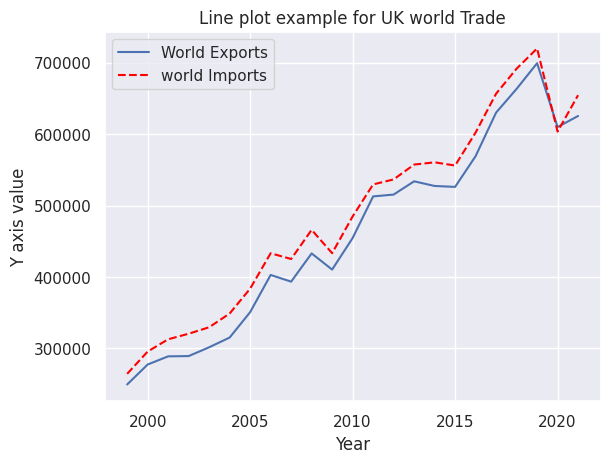

In [36]:
plt.plot(df_wide["year"],df_wide["Exports"], label = "World Exports") # define plot variables and label
plt.plot(df_wide["year"], df_wide["Imports"], label = "world Imports",linestyle="dashed",color = "red") # you can define additional plots, define line etc. 
plt.ylabel("Y axis value")
plt.xlabel("Year")
plt.title("Line plot example for UK world Trade")
plt.legend()
plt.show()  

#### seaborn default

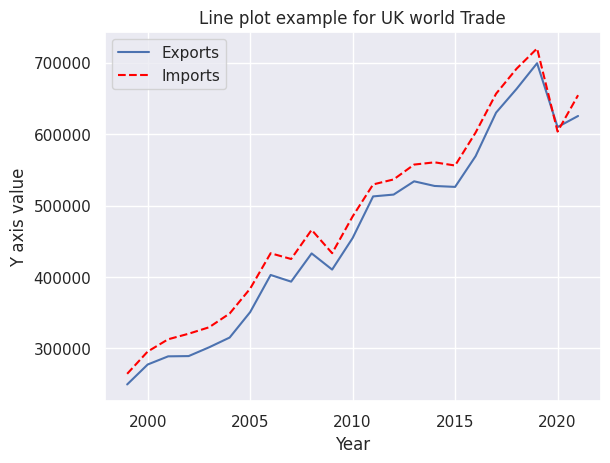

In [37]:
sns.lineplot(x=df_wide.year,y=df_wide.Exports, label = "Exports") # define seaborn using sns. 
sns.lineplot(x=df_wide.year,y=df_wide.Imports, label = "Imports",linestyle="dashed",color = "red")
plt.ylabel("Y axis value")
plt.xlabel("Year")
plt.title("Line plot example for UK world Trade")
plt.show()

the seaborn default is alsmot exactly the same as matplotlibs, minus the extra line of code to display the legend. However, seaborn lineplot you can utilise long data for this grouped line plot. 

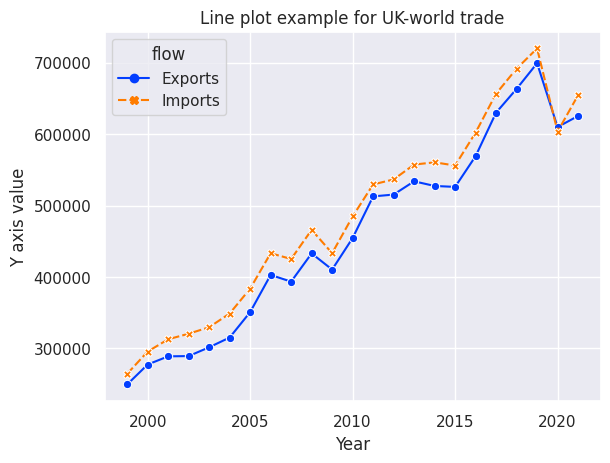

In [42]:
sns.lineplot(x=df.year,y=df.value,data=df,hue = df.flow, style = df.flow,  markers=True, palette="bright") # palletes = bright, muted, flare, deep, dark, colorblind
plt.ylabel("Y axis value")
plt.xlabel("Year")
plt.title("Line plot example for UK-world trade")
plt.show()

If you were looking to plot multiple plots together - utilising seaborns simple and eays to use hue input for grouped data is advantageous. 

## Bar plot

Example: single bar and multi bar plot for UK exports broken down by trade type (goods/services)

In [27]:
# replot data for totla UK exports (2010+)
df = ons.loc[(ons["Country Code"] == "W1") & (ons["flow"] == "Exports") & (ons["year"]>=2010)]
df_wide = df.pivot_table(index=["Country Code", "Country","year","flow","eu_flag"], 
                    columns='trade_type', 
                    values='value').reset_index()
df_wide

trade_type,Country Code,Country,year,flow,eu_flag,Goods,Services,Total
0,W1,World Total,2010,Exports,Non-EU,265673.00000,188804.00000,454477.00000
1,W1,World Total,2011,Exports,Non-EU,302288.00000,210482.00000,512770.00000
2,W1,World Total,2012,Exports,Non-EU,298360.00000,216960.00000,515320.00000
3,W1,World Total,2013,Exports,Non-EU,299462.00000,234430.00000,533892.00000
4,W1,World Total,2014,Exports,Non-EU,288783.00000,238603.00000,527386.00000
5,W1,World Total,2015,Exports,Non-EU,280395.00000,245688.00000,526083.00000
6,W1,World Total,2016,Exports,Non-EU,297909.00000,271202.00000,569111.00000
7,W1,World Total,2017,Exports,Non-EU,337940.00000,292161.00000,630101.00000
8,W1,World Total,2018,Exports,Non-EU,350844.00000,312481.00000,663325.00000
9,W1,World Total,2019,Exports,Non-EU,371955.00000,327295.00000,699250.00000


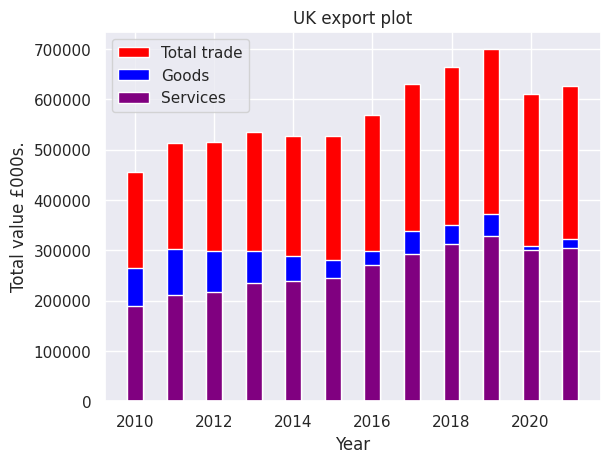

In [10]:
plt.bar(df_wide["year"], df_wide["Total"], color ='red', width = 0.4, label = "Total trade")
plt.bar(df_wide["year"], df_wide["Goods"], color ='blue', width = 0.4, label = "Goods")
plt.bar(df_wide["year"], df_wide["Services"], color ='purple', width = 0.4, label = "Services")
plt.xlabel("Year")
plt.ylabel("Total value £000s.")
plt.title("UK export plot")
plt.legend()
plt.show()

The end result of the default plot is to stack bar on top of each other (but not by increasing the scale of y-axis like a stacked bar plot). 

#### Stacked bar chart 2. 

By defining the bottom argument within plt.bar we can stack bars ontop of each other keeping the size of the bar and not overlapping. 

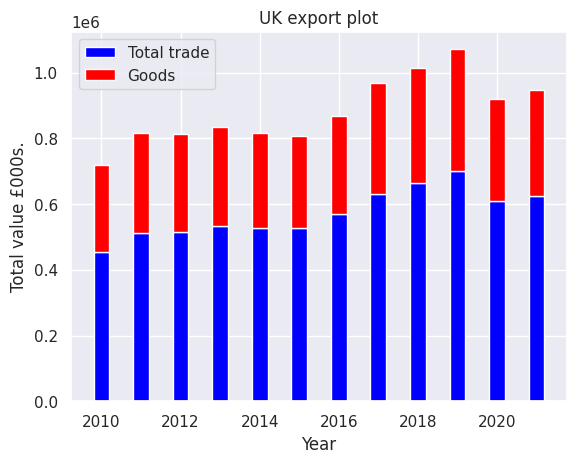

In [33]:
plt.bar(df_wide["year"], df_wide["Total"], color ='blue', width = 0.4, label = "Total trade")
plt.bar(df_wide["year"], df_wide["Goods"], bottom = df_wide["Total"],color ='red', width = 0.4, label = "Goods")
#plt.bar(df_wide["year"], df_wide["Services"], bottom = df_wide["Goods"],color ='purple', width = 0.4, label = "Services")
plt.xlabel("Year")
plt.ylabel("Total value £000s.")
plt.title("UK export plot")
plt.legend()
plt.show()

#### NOTE: unable to correctly plot a stacked bar using default for 3 series. 2 series is fine but bars are incorrect size using 3. 
#### need to find solution tbc.

#### df.plot example (best way)

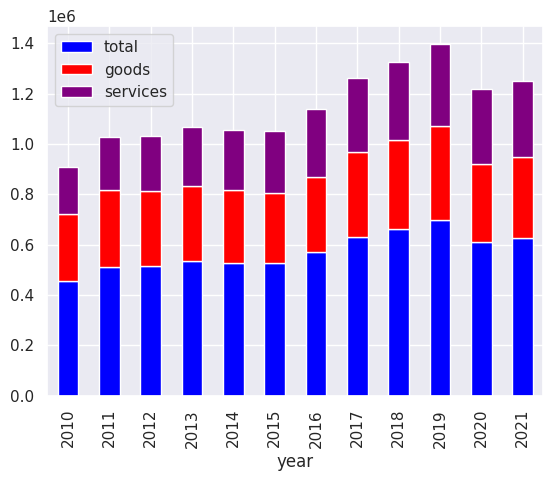

In [22]:
# create dataframe of values
df = pd.DataFrame({'year': df_wide["year"],
                   'total': df_wide["Total"],
                   'goods': df_wide["Goods"],
                   'services': df_wide["Services"]})

# create plot and use stacked argument
df.set_index('year').plot(kind='bar', stacked=True, color=['blue', 'red', 'purple'])
plt.show()

##### EXAMPLE: multiple bar plot using matplotlib

example from https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

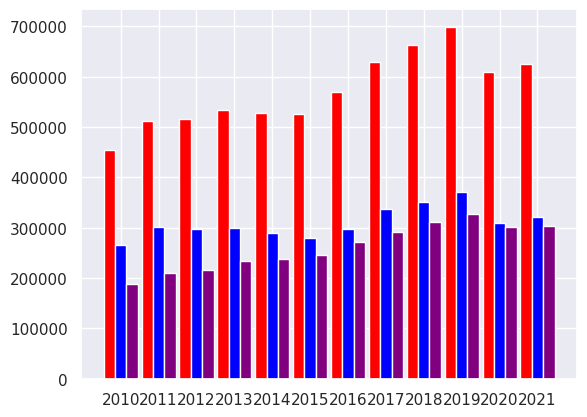

In [64]:
# set width of bar
barWidth = 0.3
# Set position of bar on X axis
yr = df_wide["year"]
br1 = np.arange(len(yr))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


plt.bar(br1, df_wide["Total"], color ='red', width = barWidth, label = "Total")
plt.bar(br2, df_wide["Goods"], color ='blue', width = barWidth,label = "Total")
plt.bar(br3, df_wide["Services"], color ='purple', width = barWidth, label = "Total")


# define x axis
plt.xticks([r + barWidth for r in range(len(yr))], yr)

plt.show()

The code is more complex than using seaborn. Compare multi-bar plot using sns:

##### seaborn (utilises long data format)

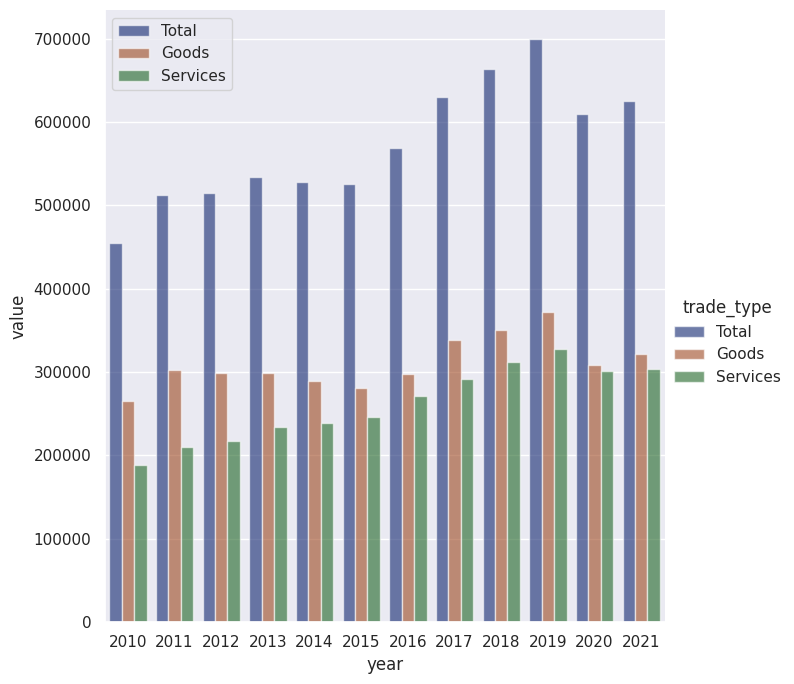

In [86]:
g = sns.catplot(
      data=df, 
      kind="bar", # define plot. Can chose from many using catplot. 
      x="year", y="value", hue="trade_type", # plot inputs
      palette="dark", # sns color palette: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
      alpha=.6, # shading 
      height = 7 # height adjustment for chart
)
plt.legend() # sns has default legend outside of plot. plt creates additional legend. 
plt.show()

Point to emphasise here is that using seaborn catplot is a simpler, quicker and easier way to plot grouped plots and multi-bar plots than matplotlib. For beginners this is very helpful before becoming much more versed in the matplotlib library. 

## Scatter plot

use inbuilt dataset for scatter plot data

In [3]:
!pip install sklearn
from sklearn.datasets import load_iris
#from sklearn import datasets
#dir(datasets)

Looking in indexes: https://s3-eu-west-2.amazonaws.com/mirrors.notebook.uktrade.io/pypi/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 105.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 313.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 64.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=11b8910bebc96deaf6d600211ca5739b9b7b2c6470fa09ef78dd5811b1c7f51f
  Stored in directory: /tmp/pip-ephem-wheel-cache-of93lc_i/wheels/f4/d9/fa/c3119524288f4a273f12af86f7f3f25af48fd5cf49cf111126
Successfully built sklearn

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# Load Iris data (https://en.wikipedia.org/wiki/Iris_flower_data_set)
iris = load_iris()
# Load iris into a dataframe and set the field names
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10000,3.50000,1.40000,0.20000
1,4.90000,3.00000,1.40000,0.20000
2,4.70000,3.20000,1.30000,0.20000
3,4.60000,3.10000,1.50000,0.20000
4,5.00000,3.60000,1.40000,0.20000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


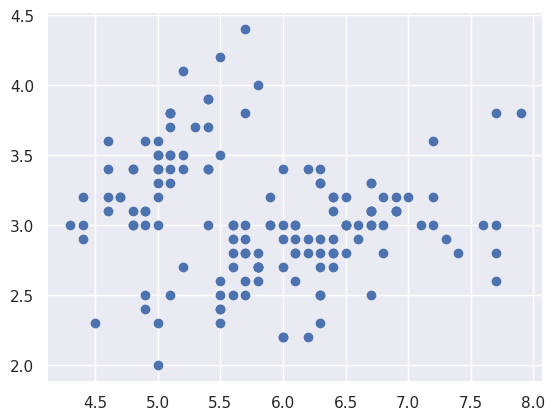

In [5]:
x = df["sepal length (cm)"]
y = df["sepal width (cm)"]
plt.scatter(x,y)
plt.show()

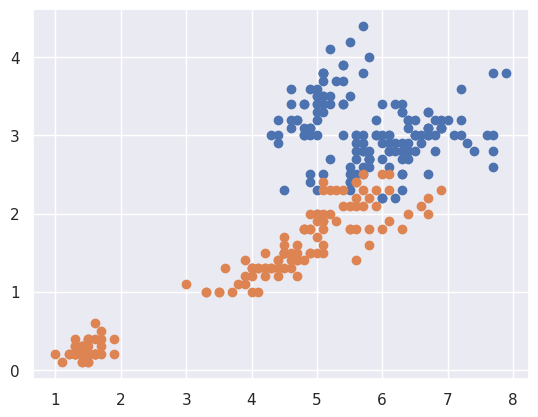

In [6]:
x = df["sepal length (cm)"]
y = df["sepal width (cm)"]
plt.scatter(x,y)
# add second plot for petal

x = df["petal length (cm)"]
y = df["petal width (cm)"]
plt.scatter(x,y)
plt.show()

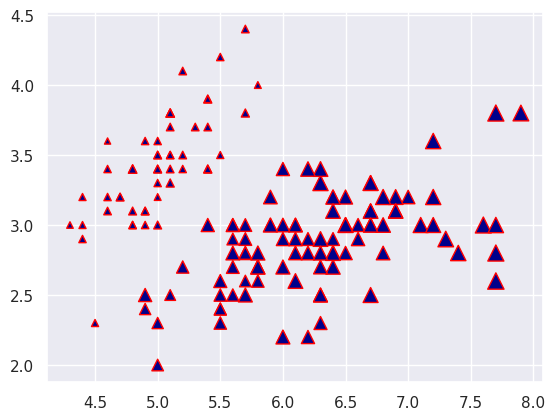

In [16]:
x = df["sepal length (cm)"]
y = df["sepal width (cm)"]
size = df["petal length (cm)"]*20 # add a further variable to increase size of plots
plt.scatter(x,y, s = size, 
            color = "darkblue",
            linewidths = 1,
            marker ="^",
            edgecolor ="red")
plt.show()

#### seaborn scatter plot

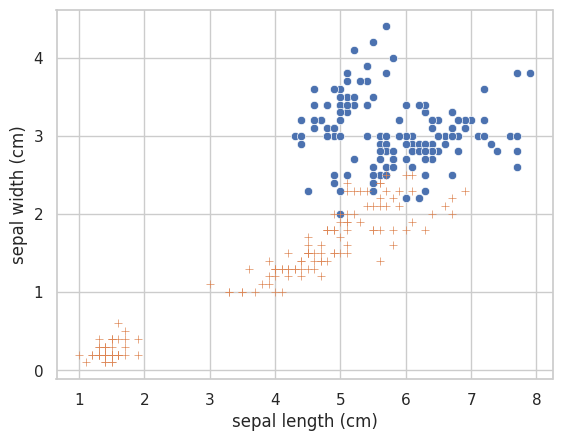

In [31]:
sns.set(style='whitegrid')
sns.scatterplot(data = df,
                x = "sepal length (cm)",
                y = "sepal width (cm)")

sns.scatterplot(data = df,
                x = "petal length (cm)",
                y = "petal width (cm)",
                marker = '+')

plt.show()

#### grouped scatter plot

In [50]:
# create grouping
df["group"] = np.where(df["sepal length (cm)"] >6, "Large",
              np.where(df["sepal length (cm)"] > 5, "Medium","Small"))

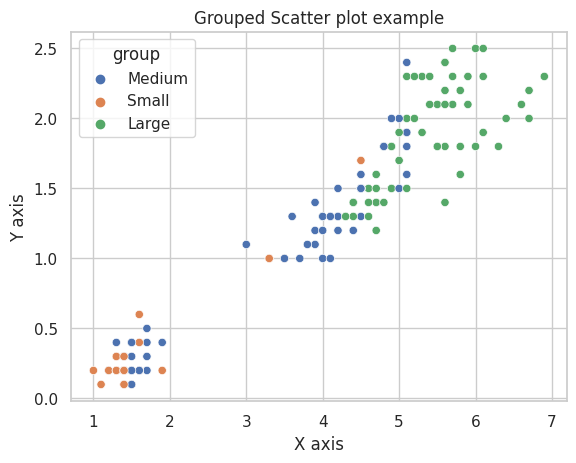

In [54]:
# using seaborn
### unsure how the most effective way doing this using matplotlib

sns.scatterplot(data = df,
                x = "petal length (cm)",
                y = "petal width (cm)",
                marker = 'o',
                hue = "group")

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Grouped Scatter plot example")

plt.show()

## Distribution plots

## Histogram

## Violin plot